<a href="https://colab.research.google.com/github/Sahil-Singh2002/Solving-PDE-s-using-Deep-Learning-Algorithms/blob/Sahil-Singh2002-patch-1/2D_Exact_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
def domain_1(x):
    # Triangle constraints
    in_triangle = (x[0] >= 0) & (x[1] >= 0) & (x[0] + x[1] <= 1)

    # Point must satisfy both the triangle constraints
    return in_triangle

def domain_2(x, w_i, b_i):
    # Triangle constraints
    in_domain_1 = domain_1(x)

    # Hyperplane constraint: w1*x1 + w2*x2 + b => 0
    in_half_space = (w_i.T @ x - b_i >= 0)

    # Point must satisfy both the triangle constraints and the hyperplane constraint
    return in_domain_1 & in_half_space


def domain_3(x, w_j, w_i, b_i, b_j):
    # Triangle constraints
    in_domain_2 = domain_2(x, w_i, b_i)

    # Hyperplane constraint: w1*x1 + w2*x2 + b => 0
    in_half_space = (w_j.T @ x - b_j >= 0)

    # Point must satisfy both the triangle constraints and the hyperplane constraint
    return in_domain_2 & in_half_space


# Step 1: Solve the linear systems for each node
  # Node 1
A1_1 = np.array([[1, 0], [0, 1]])
b1_1 = np.array([0, 0])
x1 = np.linalg.solve(A1_1, b1_1)


  # Node 2
A2_1 = np.array([[1, 0], [1, 1]])
b2_1 = np.array([0, 1])
x2 = np.linalg.solve(A2_1, b2_1)


  # Node 3
A3_1 = np.array([[0, 1], [1, 1]])
b3_1 = np.array([0, 1])
x3 = np.linalg.solve(A3_1, b3_1)


# Store the results in a list of dictionaries
nodes_1 = [
    {"node": 1, "coordinates": x1},
    {"node": 2, "coordinates": x2},
    {"node": 3, "coordinates": x3}
]

print("____________________Step 1 Nodes order and viable____________________")
# Print the list of nodes
for node in nodes_1:
    print(f"Node {node['node']} coordinates: {node['coordinates']}")


#Step 2
print("____________________Step 2 Nodes order and viable____________________")
  #Hypothetical hyperplane adjust the hyper plane dynamically for the NN later.
w_i , b = np.array([-2, 1]) , +1 # where -2x+y = 1
#b = 3 #This just implies 4*x1 +6*x2 >= 3 your hyperplane

  #Check if the old nodes from nodes_1 are viable for for the new domain

# Filtering nodes based on domain_2 viability
nodes_1_filtered = [node for node in nodes_1 if domain_2(node["coordinates"], w_i, b)]

print("____________________Nodes 1 filtered to new domain____________________")
# Print the filtered nodes
for node in nodes_1_filtered:
    print(f"Node {node['node']} coordinates: {node['coordinates']} is True")


#Solve the linear systems for each node
  # Node 4
A4_2 = np.array([[1, 1], [4, 6]])
b4_2 = np.array([1, 3])
x4 = np.linalg.solve(A4_2, b4_2)


  # Node 5
A5_2 = np.array([[1, 0], [4, 6]])
b5_2 = np.array([0, 3])
x5 = np.linalg.solve(A5_2, b5_2)


  # Node 6
A6_2 = np.array([[0, 1], [4, 6]])
b6_2 = np.array([0, 3])
x6 = np.linalg.solve(A6_2, b6_2)


# Store the results in a list of dictionaries
nodes_2_dummy = [
    {"node": 4, "coordinates": x4},
    {"node": 5, "coordinates": x5},
    {"node": 6, "coordinates": x6}
]

# Filtering nodes based on domain_2 viability
nodes_2 = [node for node in nodes_2_dummy if domain_2(node["coordinates"], w_i, b)]

print("_____All nodes_2_______")
# Print the filtered nodes
for node in nodes_2:
    print(f"Node {node['node']} coordinates: {node['coordinates']} is True")

def euclidean_distance(coord1, coord2):
    """Calculate the Euclidean distance between two coordinates."""
    return np.linalg.norm(coord1 - coord2)

def reorder_nodes(reference_node, nodes_to_sort):
    """
    Reorders the nodes in `nodes_to_sort` such that the first node is the closest
    to `reference_node`, and each subsequent node is closest to the previous one.
    """
    ordered_nodes = []
    remaining_nodes = nodes_to_sort.copy()
    current_reference = reference_node

    while remaining_nodes:
        # Find the closest node to the current reference
        closest_node = min(
            remaining_nodes,
            key=lambda node: euclidean_distance(current_reference, node["coordinates"])
        )
        # Add the closest node to the ordered list and update the reference
        ordered_nodes.append(closest_node)
        remaining_nodes.remove(closest_node)
        current_reference = closest_node["coordinates"]

    return ordered_nodes

# Use the last node from nodes_1_filtered as the starting reference
if nodes_1_filtered:
    last_node_coordinates = nodes_1_filtered[-1]["coordinates"]
    reordered_nodes_2 = reorder_nodes(last_node_coordinates, nodes_2)

    print("____________________Reordered Nodes 2____________________")
    for node in reordered_nodes_2:
        print(f"Node {node['node']} coordinates: {node['coordinates']}")
else:
    print("No nodes in nodes_1_filtered to use as a reference for reordering nodes_2.")

# Merge nodes_1_filtered and reordered_nodes_2
nodes_2_filtered = nodes_1_filtered + reordered_nodes_2

print("____________________Merged Nodes: nodes_2_filtered____________________")
for node in nodes_2_filtered:
    print(f"Node {node['node']} coordinates: {node['coordinates']}")

____________________Step 1 Nodes order and viable____________________
Node 1 coordinates: [0. 0.]
Node 2 coordinates: [0. 1.]
Node 3 coordinates: [1. 0.]
____________________Step 2 Nodes order and viable____________________
____________________Nodes 1 filtered to new domain____________________
Node 2 coordinates: [0. 1.] is True
_____All nodes_2_______
____________________Reordered Nodes 2____________________
____________________Merged Nodes: nodes_2_filtered____________________
Node 2 coordinates: [0. 1.]


#Function

In [ ]:
import numpy as np

def domain_1(x: np.ndarray) -> bool:
    """
    Check if a point lies within a triangle defined by constraints:
    - x[0] >= 0
    - x[1] >= 0
    - x[0] + x[1] <= 1

    Args:
        x (np.ndarray): A 2D point as a NumPy array.

    Returns:
        bool: True if the point lies within the triangle, False otherwise.
    """
    return (x[0] >= 0) & (x[1] >= 0) & (x[0] + x[1] <= 1)

def domain_2(x: np.ndarray, w_i: np.ndarray, b_i: float) -> bool:
    """
    Check if a point lies within the intersection of a triangle (domain_1)
    and a half-space defined by a hyperplane:
        w_i.T @ x - b_i >= 0

    Args:
        x (np.ndarray): A 2D point as a NumPy array.
        w_i (np.ndarray): A 2D weight vector defining the hyperplane.
        b_i (float): A bias term for the hyperplane.

    Returns:
        bool: True if the point satisfies both constraints, False otherwise.
    """
    return domain_1(x) & (np.dot(w_i, x) >= b_i)

def domain_3(x: np.ndarray, w_j: np.ndarray, w_i: np.ndarray, b_i: float, b_j: float) -> bool:
    """
    Check if a point lies within the intersection of domain_2
    and another half-space defined by a second hyperplane:
        w_j.T @ x - b_j >= 0

    Args:
        x (np.ndarray): A 2D point as a NumPy array.
        w_j (np.ndarray): A 2D weight vector for the second hyperplane.
        w_i (np.ndarray): A 2D weight vector for the first hyperplane.
        b_i (float): A bias term for the first hyperplane.
        b_j (float): A bias term for the second hyperplane.

    Returns:
        bool: True if the point satisfies all constraints, False otherwise.
    """
    return domain_2(x, w_i, b_i) & ((w_j.T @ x) >= b_j )

def euclidean_distance(coord1: np.ndarray, coord2: np.ndarray) -> float:
    """
    Calculate the Euclidean distance between two 2D coordinates.

    Args:
        coord1 (np.ndarray): The first coordinate as a NumPy array.
        coord2 (np.ndarray): The second coordinate as a NumPy array.

    Returns:
        float: The Euclidean distance between coord1 and coord2.
    """
    return np.linalg.norm(coord1 - coord2)

def reorder_nodes(reference_node: np.ndarray, nodes_to_sort: list[dict]) -> list[dict]:
    """
    Reorders a list of nodes based on proximity to a reference node.
    The closest node is chosen first, and each subsequent node is the closest
    to the previous one.

    Args:
        reference_node (np.ndarray): A 2D coordinate representing the reference node.
        nodes_to_sort (list[dict]): A list of nodes, where each node is a dictionary
                                    containing a "coordinates" key with a 2D NumPy array.

    Returns:
        list[dict]: A reordered list of nodes sorted by proximity.
    """
    ordered_nodes = []
    remaining_nodes = nodes_to_sort.copy()
    current_reference = reference_node

    while remaining_nodes:
        # Find the closest node to the current reference
        closest_node = min(
            remaining_nodes,
            key=lambda node: euclidean_distance(current_reference, node["coordinates"])
        )
        # Add the closest node to the ordered list
        ordered_nodes.append(closest_node)
        # Remove the exact node by identity, not by value
        remaining_nodes = [node for node in remaining_nodes if node is not closest_node]
        # Update the current reference to the closest node
        current_reference = closest_node["coordinates"]

    return ordered_nodes

#Step 1

In [ ]:
# Step 1: Solve the linear systems for each node
# x is defined as (x,y) for desmose demonstration

boundary_1,b1 = np.array([1,0]), 0 # where x = 1
boundary_2,b2 = np.array([0,1]), 0 # where y = 1
boundary_3,b3 = np.array([1,1]), 1 # where x + y = 1

A1_1 = np.array([boundary_1, boundary_2])
b1_1 = np.array([b1, b2])
x1 = np.linalg.solve(A1_1, b1_1)

A2_1 = np.array([boundary_3, boundary_1])
b2_1 = np.array([b3, b1])
x2 = np.linalg.solve(A2_1, b2_1)

A3_1 = np.array([boundary_2, boundary_3])
b3_1 = np.array([b2, b3])
x3 = np.linalg.solve(A3_1, b3_1)

# Store the results in a list of dictionaries, including A and b
nodes_1 = [
    {"node": 1, "coordinates": x1, "A": A1_1, "b": b1_1},
    {"node": 2, "coordinates": x2, "A": A2_1, "b": b2_1},
    {"node": 3, "coordinates": x3, "A": A3_1, "b": b3_1},
]

print("____________________Step 1 Nodes order and viable____________________")
for node in nodes_1:
    print(f"Node {node['node']} coordinates: {node['coordinates']}, A: {node['A']}, b: {node['b']}")

____________________Step 1 Nodes order and viable____________________
Node 1 coordinates: [0. 0.], A: [[1 0]
 [0 1]], b: [0 0]
Node 2 coordinates: [0. 1.], A: [[1 1]
 [1 0]], b: [1 0]
Node 3 coordinates: [1. 0.], A: [[0 1]
 [1 1]], b: [0 1]


#Step 2

In [ ]:
# Step 2: Define hyperplane and filter nodes, needs be dynamically changing

w_i, b_i = np.array([4, 6]), 3  # Hyperplane y - 0.5x = - 1
nodes_1_filtered = [node for node in nodes_1 if domain_2(node["coordinates"], w_i, b_i)]

print("____________________Nodes 1 filtered to new domain____________________")
for node in nodes_1_filtered:
    print(f"Node {node['node']} coordinates: {node['coordinates']}, A: {node['A']}, b: {node['b']}")

# Solve the linear systems for the new nodes
A4_2 = np.array([w_i, boundary_3])
b4_2 = np.array([b_i, b3])
x4 = np.linalg.solve(A4_2, b4_2)


A5_2 = np.array([w_i, boundary_1])
b5_2 = np.array([b_i, b1])
x5 = np.linalg.solve(A5_2, b5_2)

A6_2 = np.array([boundary_2, w_i])
b6_2 = np.array([b2, b_i])
x6 = np.linalg.solve(A6_2, b6_2)

print("______________________________________________________________________")

# Store the results in a list of dictionaries, including A and b
nodes_2_dummy = [
    {"node": 4, "coordinates": x4, "A": A4_2, "b": b4_2},
    {"node": 5, "coordinates": x5, "A": A5_2, "b": b5_2},
    {"node": 6, "coordinates": x6, "A": A6_2, "b": b6_2},
]

print("____________________Step 2 Nodes____________________")
for node in nodes_2_dummy:
    print(f"Node {node['node']} coordinates: {node['coordinates']}, A: {node['A']}, b: {node['b']}")


____________________Nodes 1 filtered to new domain____________________
Node 2 coordinates: [0. 1.], A: [[1 1]
 [1 0]], b: [1 0]
Node 3 coordinates: [1. 0.], A: [[0 1]
 [1 1]], b: [0 1]
______________________________________________________________________
____________________Step 2 Nodes____________________
Node 4 coordinates: [ 1.5 -0.5], A: [[4 6]
 [1 1]], b: [3 1]
Node 5 coordinates: [0.  0.5], A: [[4 6]
 [1 0]], b: [3 0]
Node 6 coordinates: [0.75 0.  ], A: [[0 1]
 [4 6]], b: [0 3]


In [ ]:

# Filter the new nodes based on domain_2
nodes_2 = [node for node in nodes_2_dummy if domain_2(node["coordinates"], w_i, b_i)]

print("_____All nodes_2_filtered _______")
for node in nodes_2:
    print(f"Node {node['node']} coordinates: {node['coordinates']}, A: {node['A']}, b: {node['b']}")

# Reorder nodes_2 based on proximity to the last node in nodes_1_filtered
if nodes_1_filtered:
    last_node_coordinates = nodes_1_filtered[-1]["coordinates"]
    reordered_nodes_2 = reorder_nodes(last_node_coordinates, nodes_2)

    print("____________________Reordered Nodes 2____________________")
    for node in reordered_nodes_2:
        print(f"Node {node['node']} coordinates: {node['coordinates']}, A: {node['A']}, b: {node['b']}")
else:
    print("No nodes in nodes_1_filtered to use as a reference for reordering nodes_2.")

# Merge nodes_1_filtered and reordered_nodes_2
nodes_2_filtered = nodes_1_filtered + reordered_nodes_2

print("____________________Merged Nodes:____________________")
for node in nodes_2_filtered:
    print(f"Node {node['node']} coordinates: {node['coordinates']}, A: {node['A']}, b: {node['b']}")

#This will give the neccesary nodes for for the diagonal enteries of the mass matrix M_ii

_____All nodes_2_filtered _______
Node 5 coordinates: [0.  0.5], A: [[4 6]
 [1 0]], b: [3 0]
Node 6 coordinates: [0.75 0.  ], A: [[0 1]
 [4 6]], b: [0 3]
____________________Reordered Nodes 2____________________
Node 6 coordinates: [0.75 0.  ], A: [[0 1]
 [4 6]], b: [0 3]
Node 5 coordinates: [0.  0.5], A: [[4 6]
 [1 0]], b: [3 0]
____________________Merged Nodes:____________________
Node 2 coordinates: [0. 1.], A: [[1 1]
 [1 0]], b: [1 0]
Node 3 coordinates: [1. 0.], A: [[0 1]
 [1 1]], b: [0 1]
Node 6 coordinates: [0.75 0.  ], A: [[0 1]
 [4 6]], b: [0 3]
Node 5 coordinates: [0.  0.5], A: [[4 6]
 [1 0]], b: [3 0]


Use for Mass matric diagonal entries

In [ ]:
# Initialize lists to store a and b
a_list = []
b_list = []
n = len(nodes_2_filtered)  # Number of nodes
D = np.zeros((n, n))  # Initialize an n x n matrix filled with zeros
# Now, compare subsequent nodes, including comparing the last node with the first node
for i in range(0, n):
    # The next node index, wrap around to the first node when at the last node
    next_node_index = (i + 1) % n

    for j in range(len(nodes_2_filtered[i]["A"])):
        for k in range(len(nodes_2_filtered[next_node_index]["A"])):
            if np.array_equal(nodes_2_filtered[i]["A"][j], nodes_2_filtered[next_node_index]["A"][k]):
                # If a match is found for the row of A
                a_list.append(nodes_2_filtered[i]["A"][j])
                b_list.append(nodes_2_filtered[i]["b"][j])

# Now that we have appended matching values for a and b, print the final a_list and b_list
print("a_list:", a_list)
print("b_list:", b_list)


# Loop through each pair of nodes and calculate the distance
for i in range(n):
    for j in range(i, n):  # Only loop through the upper triangle (including diagonal)
        coord_i = nodes_2_filtered[i]["coordinates"]
        coord_j = nodes_2_filtered[j]["coordinates"]
        distance = euclidean_distance(coord_i, coord_j)

        D[i, j] = distance  # Fill upper triangle
        D[j, i] = distance  # Fill lower triangle (matrix is symmetric)


print("____________________Merged Nodes:____________________")
for node in nodes_2_filtered:
    print(f"Node {node['node']} coordinates: {node['coordinates']}, A: {node['A']}, b: {node['b']}")
# Print the resulting distance matrix M
print("Distance Matrix d_{i,j}:")
print(D)

a_list: [array([1, 1]), array([0, 1]), array([4, 6]), array([1, 0])]
b_list: [1, 0, 3, 0]
____________________Merged Nodes:____________________
Node 2 coordinates: [0. 1.], A: [[1 1]
 [1 0]], b: [1 0]
Node 3 coordinates: [1. 0.], A: [[0 1]
 [1 1]], b: [0 1]
Node 6 coordinates: [0.75 0.  ], A: [[0 1]
 [4 6]], b: [0 3]
Node 5 coordinates: [0.  0.5], A: [[4 6]
 [1 0]], b: [3 0]
Distance Matrix d_{i,j}:
[[0.         1.41421356 1.25       0.5       ]
 [1.41421356 0.         0.25       1.11803399]
 [1.25       0.25       0.         0.90138782]
 [0.5        1.11803399 0.90138782 0.        ]]


In [ ]:
# Now, calculate the summation formula
summation_result = 0

for i in range(n):
    b_i = b_list[i]  # b_i for node i
    a_i = a_list[i]  # a_i for node i

    # Compute the norm of a_i
    norm_a_i = np.linalg.norm(a_i)

    # Sum of distances d_ij for all j
    sum_d_ij = 0
    for j in range(n):
        sum_d_ij += D[i, j]  # Use the precomputed distance matrix D

    # Add the term to the summation result
    summation_result += (b_i / norm_a_i) * sum_d_ij

# Final result: divide by n to get the average
final_result = (1 / 2) * summation_result

print("Final result of the summation formula:", final_result)

Final result of the summation formula: 1.6182372939149203


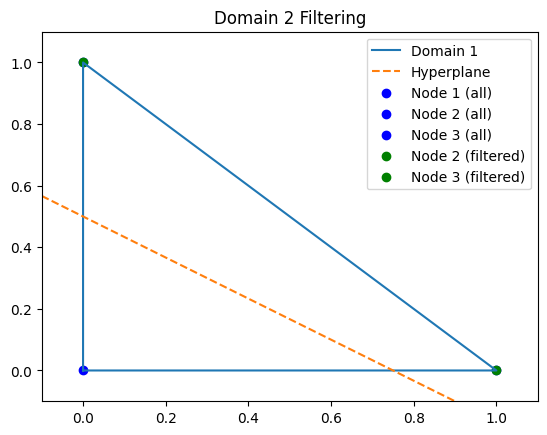

In [ ]:
import matplotlib.pyplot as plt

def plot_domains(nodes, filtered_nodes, w, b, domain_title=""):
    fig, ax = plt.subplots()
    # Plot the original triangle
    triangle = np.array([[0, 0], [1, 0], [0, 1], [0, 0]])
    ax.plot(triangle[:, 0], triangle[:, 1], label="Domain 1")

    # Plot the hyperplane
    x_vals = np.linspace(-0.1, 1.1, 100)
    y_vals = (b - w[0] * x_vals) / w[1]
    ax.plot(x_vals, y_vals, label="Hyperplane", linestyle="--")

    # Plot nodes
    for node in nodes:
        ax.scatter(*node["coordinates"], color="blue", label=f"Node {node['node']} (all)")
    for node in filtered_nodes:
        ax.scatter(*node["coordinates"], color="green", label=f"Node {node['node']} (filtered)")

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.1, 1.1])
    ax.legend()
    ax.set_title(domain_title)
    plt.show()
w_i, b_i = np.array([4, 6]), 3  # Hyperplane y - 0.5x = - 1

plot_domains(nodes_1, nodes_1_filtered, w_i, b_i, "Domain 2 Filtering")
